**Problem Scenario:**

The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

**Problem Objective:**

As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.


#Initial data inspection and data cleaning

Check whether the data has duplicates, missing values, irrelevant (erroneous entries) values, or outliers.

- Import required Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

---

- Load the dataset

In [2]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


---

- Get the data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


**Observations:**

- There are unnecessary columns, i.e., `Unnamed: 0`, `id`, `uri`
- There are data types, `int64`, `float64` and `object`
- `release_date` should be converted from `object` to `date` type.

---



- Remove unnecessary columns (features)

In [4]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0', 'id', 'uri'], inplace=True)
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


- Convert `release_date` column to `date`
- Consider only `year`
- Rename `release_date` to `release_year`

In [6]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.year
df.rename(columns={'release_date' : 'release_year'}, inplace=True)
df.head()

,name,album,release_year,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


- Inspect unique elements from `album`

In [7]:
df['album'].unique()

array(['Licked Live In NYC', 'Live At The El Mocambo',
       'Tattoo You (Super Deluxe)', 'Tattoo You', 'A Bigger Bang (Live)',
       'Steel Wheels Live', 'Goats Head Soup (Deluxe)',
       'Bridges To Buenos Aires (Live)', 'Bridges To Bremen (Live)',
       'Honk (Deluxe)', 'Voodoo Lounge Uncut (Live)',
       'From The Vault: No Security - San Jose 1999 (Live)', 'On Air',
       'On Air (Deluxe)', 'Sticky Fingers Live At The Fonda Theatre',
       'Ladies & Gentlemen (Live)', 'Blue & Lonesome',
       'Havana Moon (Live)', 'Totally Stripped - Brixton (Live)',
       'Totally Stripped - Amsterdam (Live)', 'Totally Stripped (Live)',
       'Totally Stripped - Paris (Live)',
       'Live 1965: Music From Charlie Is My Darling (Live From England/1965)',
       'Live At The Checkerboard Lounge', "Some Girls: Live In Texas '78",
       'A Bigger Bang (2009 Re-Mastered)', 'Live Licks',
       'Bridges To Babylon', 'Bridges To Babylon (Remastered)',
       'Stripped', 'Voodoo Lounge (Remas

**Observations:**

There are duplicates in `album` due to different letter cases as below.

- `got LIVE if you want it!`, `Got Live if you want it!`
- `December’s Children (And Everybody’s)`, `December's Children (and everybody's)`
- `12 x 5`, `12 X 5`
- `Out Of Our Heads (UK Sequence)` and `Out Of Our Heads (UK)`
- `England’s Newest Hitmakers`, `England's Newest Hit Makers`

These can be removed by further processing in later steps.

---

- Get the decription of the data

In [8]:
df.describe()

,release_year,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1991.745963,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,22.440296,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1964.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,1970.000000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,1986.000000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,2017.000000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,2022.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


---

#Depending on your findings, clean the data for further processing

- Check for duplicates and remove if any

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
  print(f'number of duplicate rows: {duplicates}')
  print(f"{'Original data shape':40s} {':':5s} {len(df):5d}")
  df.drop_duplicates(inplace=True)
  print(f"{'Data shape after removing duplicates':40s} {':':5s} {len(df):5d}")
else:
  print('There are no duplicates.')

number of duplicate rows: 6
Original data shape                      :      1610
Data shape after removing duplicates     :      1604


6 duplicates are removed.

---


- Check for missing values and process if any.

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Missing values found:")
    print(missing_values)
else:
  print('There are no missing values')

There are no missing values


There are no missing values.

---

Remove duplicates with same `name`. Retain the sample whoch has more `popularity` in duplicates.

In [11]:
l_old = len(df)
lu_old = len(df['album'].unique())

# Convert `album` and `name` columns to lower-case
df['album'] = df['album'].str.lower()
df['name'] = df['name'].str.lower()

df['album'] = df['album'].str.replace('’', "'")
df['album'] = df['album'].str.replace('out of our heads (uk sequence)', 'out of our heads (uk)')
df['album'] = df['album'].str.replace("england's newest hit makers", "england's newest hitmakers")

albums = df['album'].unique()
print(f"{'Album':50s} {'Old songs':10s} {'New songs':10s} {'Duplicates':10s}")
print(f"{'='*100}")
for album in albums:
  y = df[df['album'] == album]
  n_songs_old = len(y)
  y = y.sort_values(by=['popularity'], ascending=False) # Sort by popularity so that more popluarity sample is retained.
  y.drop_duplicates(subset=['name'], inplace=True)
  n_songs_new = len(y)
  df.drop(df[df['album'] == album].index, inplace=True)
  df = pd.concat([df, y])
  print(f"{album:50s} {n_songs_old:10d} {n_songs_new:10d} {(n_songs_old-n_songs_new):10d}")

print(f"{'-'*100}")

l_new = len(df)
lu_new = len(df['album'].unique())
print(f"Data was {l_old} and now it is {len(df)}.\nNumber of duplicates removed are {l_old-l_new}")
print(f"Unique albums were {lu_old} and now it is {lu_new}.\nNumber of duplicate albums removed are {lu_old-lu_new}")

Album                                              Old songs  New songs  Duplicates
licked live in nyc                                         23         23          0
live at the el mocambo                                     23         23          0
tattoo you (super deluxe)                                  46         46          0
tattoo you                                                 22         22          0
a bigger bang (live)                                       22         22          0
steel wheels live                                          27         27          0
goats head soup (deluxe)                                   37         37          0
bridges to buenos aires (live)                             22         22          0
bridges to bremen (live)                                   22         22          0
honk (deluxe)                                              47         47          0
voodoo lounge uncut (live)                                 56         28    

- Handling Outliers:

In [12]:
# Handling Outliers
# Perform outlier detection on numeric columns
df_numeric_columns = df.select_dtypes(include=['int64','float64']).columns
df_numeric_columns

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms'],
      dtype='object')

Remove `track_number` from the list to check for outliers.

In [13]:
df_numeric_columns = df_numeric_columns[1:]
df_numeric_columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

Standardise the data using `MinMaxScaler`

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Standardize the data
scaler = MinMaxScaler()

for column in df_numeric_columns:
  df[column] = scaler.fit_transform(df[[column]])

df.describe()

,release_year,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,1993.006194,8.701308,0.251049,0.459744,0.765563,0.168719,0.491914,0.751663,0.076845,0.470533,0.593706,0.278192,0.249857
std,22.196079,6.650792,0.228872,0.180503,0.208785,0.280479,0.359425,0.127630,0.083226,0.173259,0.239648,0.149768,0.111148
min,1964.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1971.000000,4.000000,0.057939,0.326948,0.629371,0.000254,0.137383,0.664914,0.022304,0.360392,0.408624,0.187500,0.182307
50%,1991.000000,7.000000,0.183091,0.444444,0.836830,0.014157,0.390431,0.774344,0.046605,0.463532,0.596509,0.262500,0.234774
75%,2017.000000,11.000000,0.405427,0.595147,0.940559,0.186747,0.903698,0.849833,0.105526,0.565889,0.797741,0.350000,0.289711
max,2022.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualize outliers

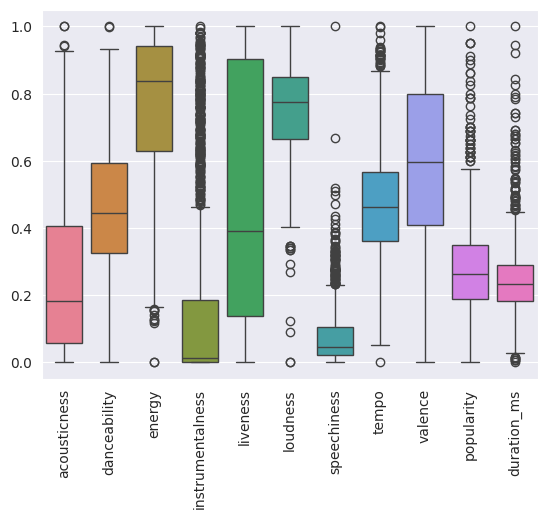

In [15]:
# Visualize outliers
sns.boxplot(df[df_numeric_columns])
plt.xticks(rotation=90)
plt.show()

Remove outliers

In [16]:
l_old = len(df)

# Remove outliers for each column
print('Percentile boundaries:')
print('======================')
for column in df_numeric_columns:
  percentiles = df[column].quantile([0.01, 0.99])
  lower_bound = percentiles.iloc[0]
  upper_bound = percentiles.iloc[1]
  print(f"{column:20s} {':':5s} {lower_bound:1.3f} {'':5s} {upper_bound:1.3f}")

  # Remove outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

l_new = len(df)
print(f"Number of outliers removed are {l_old-l_new}")

print(f"Data samples after removing outliers is {l_new}")

Percentile boundaries:
acousticness         :     0.000       0.858
danceability         :     0.098       0.867
energy               :     0.189       0.994
instrumentalness     :     0.000       0.944
liveness             :     0.025       0.992
loudness             :     0.451       0.951
speechiness          :     0.004       0.357
tempo                :     0.154       0.911
valence              :     0.114       0.994
popularity           :     0.025       0.734
duration_ms          :     0.092       0.692
Number of outliers removed are 272
Data samples after removing outliers is 1181


After handling duplicates, missing values, and outliers, the data is now cleaned and ready for further processing.

Original dataset has 1610 samples.

Processed dataset has 1181 samples.

Now preprocessing is done. Data is ready for Exploratory Data Analysis (EDA).

---



#Perform Exploratory Data Analysis and Feature Engineering

##Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album

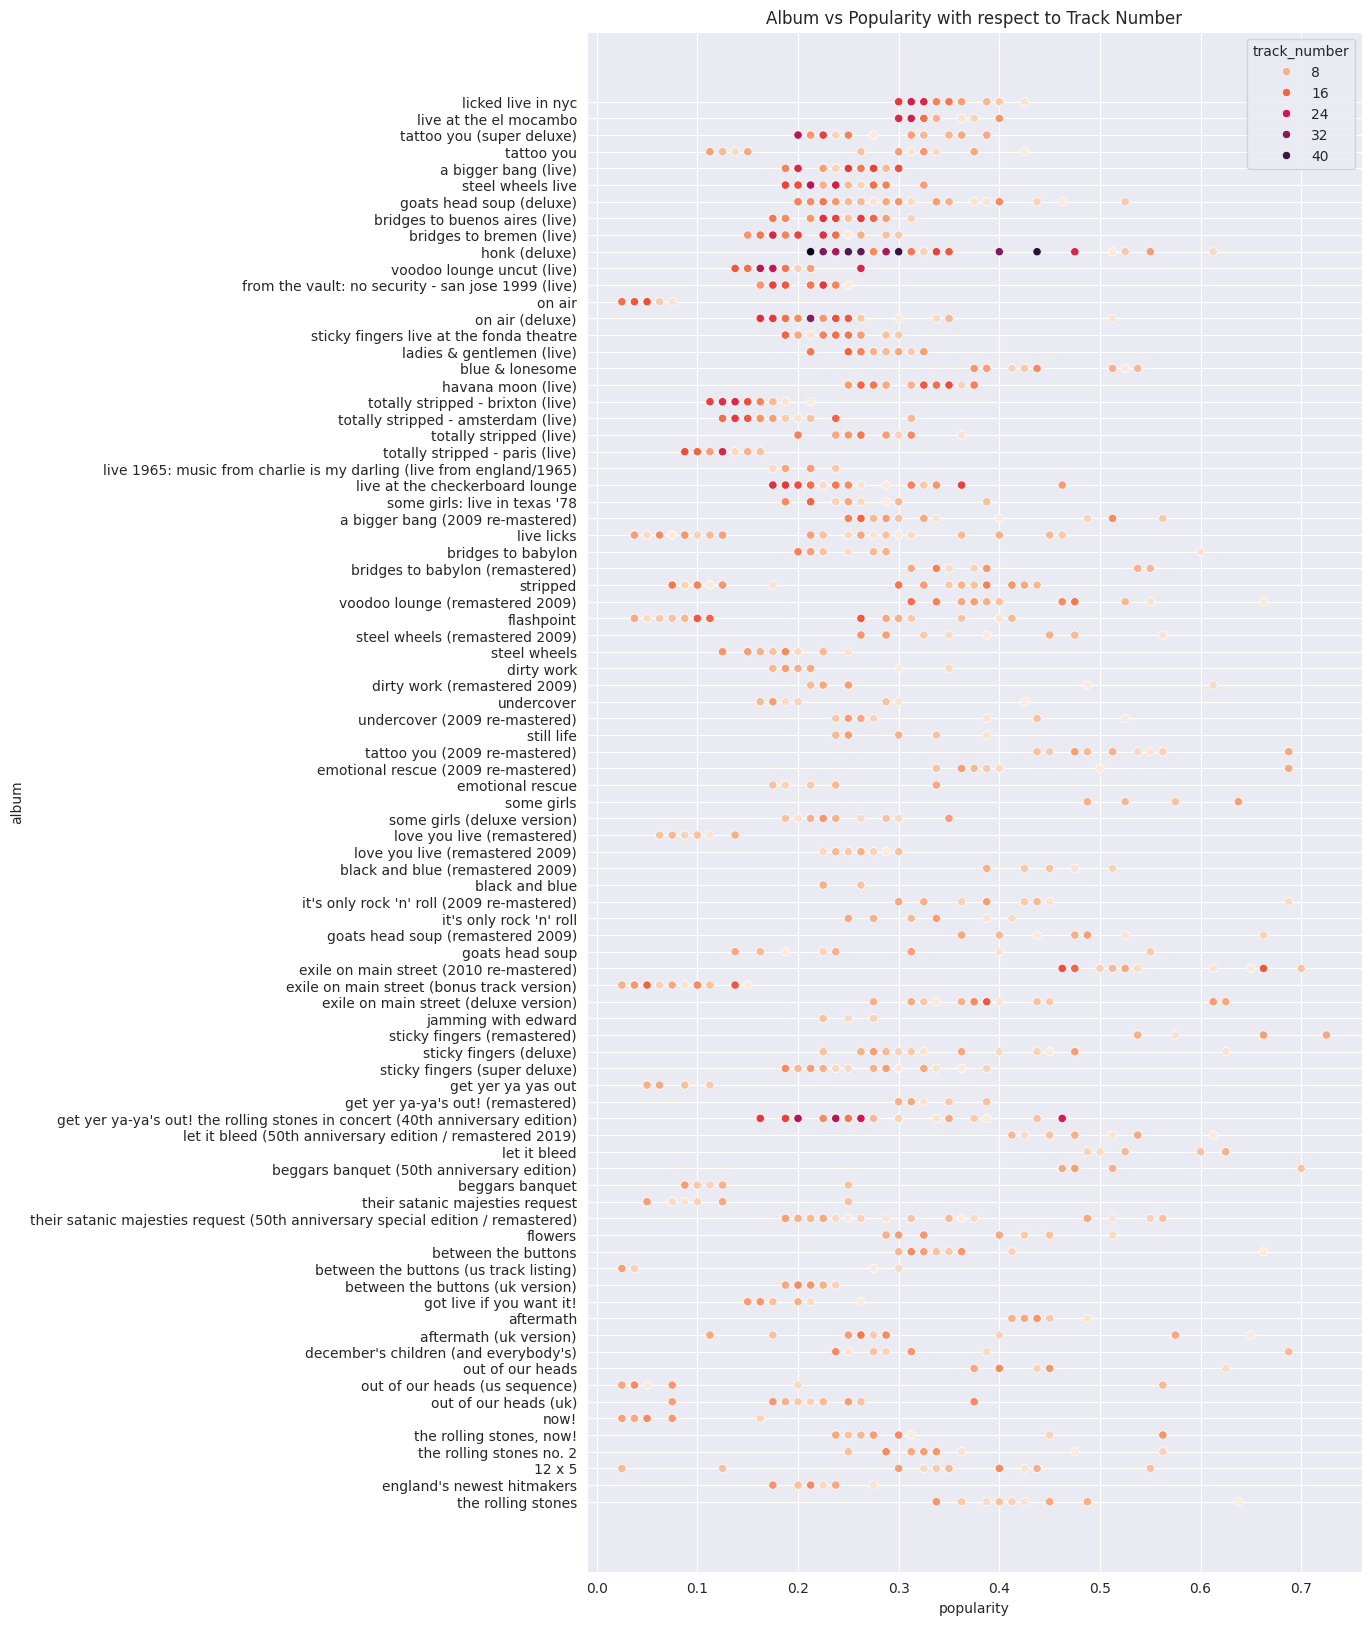

In [17]:
plt.figure(figsize=(10, 20))
sns.scatterplot(x=df['popularity'], y=df['album'], hue=df['track_number'], palette='rocket_r')
plt.title('Album vs Popularity with respect to Track Number')
plt.show()

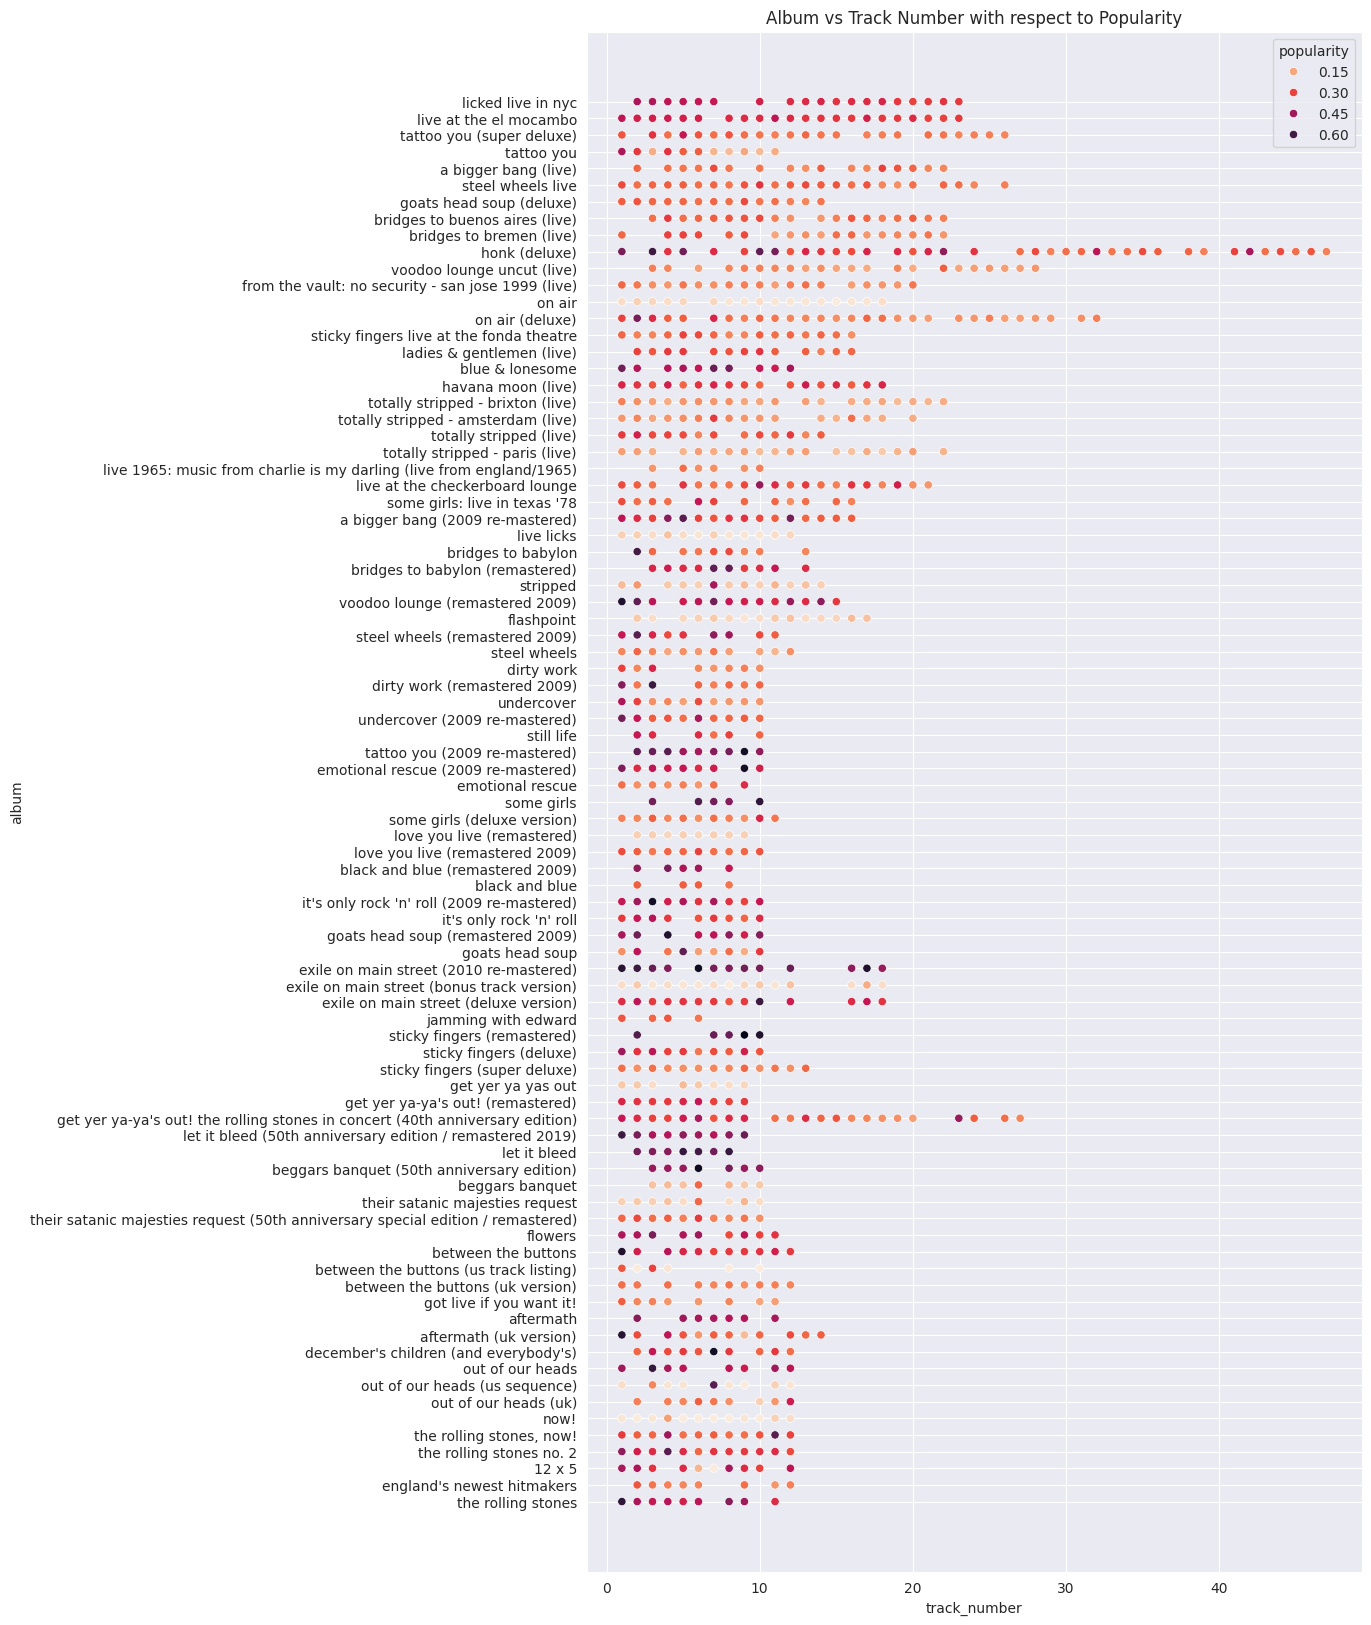

In [18]:
plt.figure(figsize=(10, 20))
sns.scatterplot(x=df['track_number'], y=df['album'], hue=df['popularity'], palette='rocket_r')
plt.title('Album vs Track Number with respect to Popularity')
plt.show()

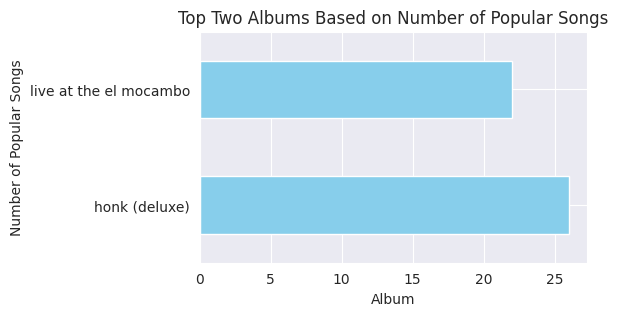


Top Two Albums Based on Number of Popular Songs:
album
honk (deluxe)             26
live at the el mocambo    22
Name: popularity, dtype: int64


In [19]:
# Get the albums which have track numbers with popularity more than average popularity
popular_albums = df[df['popularity'] >= df['popularity'].mean()]

# Group the dataset by album and count the number of popular songs in each album
popular_songs_per_album = popular_albums.groupby('album')['popularity'].count().sort_values(ascending=False)

# Select the top two albums with the highest number of popular songs
top_two_albums = popular_songs_per_album.head(2)

# Create a bar plot to visualize the number of popular songs in each album
plt.figure(figsize=(5, 3))
top_two_albums.plot(kind='barh', color='skyblue')
plt.title("Top Two Albums Based on Number of Popular Songs")
plt.xlabel("Album")
plt.ylabel("Number of Popular Songs")
# plt.xticks(rotation=45)
plt.show()

# Print the top two albums with the highest number of popular songs
print("\nTop Two Albums Based on Number of Popular Songs:")
print(top_two_albums)

**Observaion:**

It is evident from the above visualizations, `honk` and `live at the el mocambo` are the top two albums to be recommnded w.r.t. `popularity`.

---

##Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.

In [20]:
print(f"There are {len(df_numeric_columns)} numerical features. They are {df_numeric_columns}")

There are 11 numerical features. They are Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')


- Distributions of different features

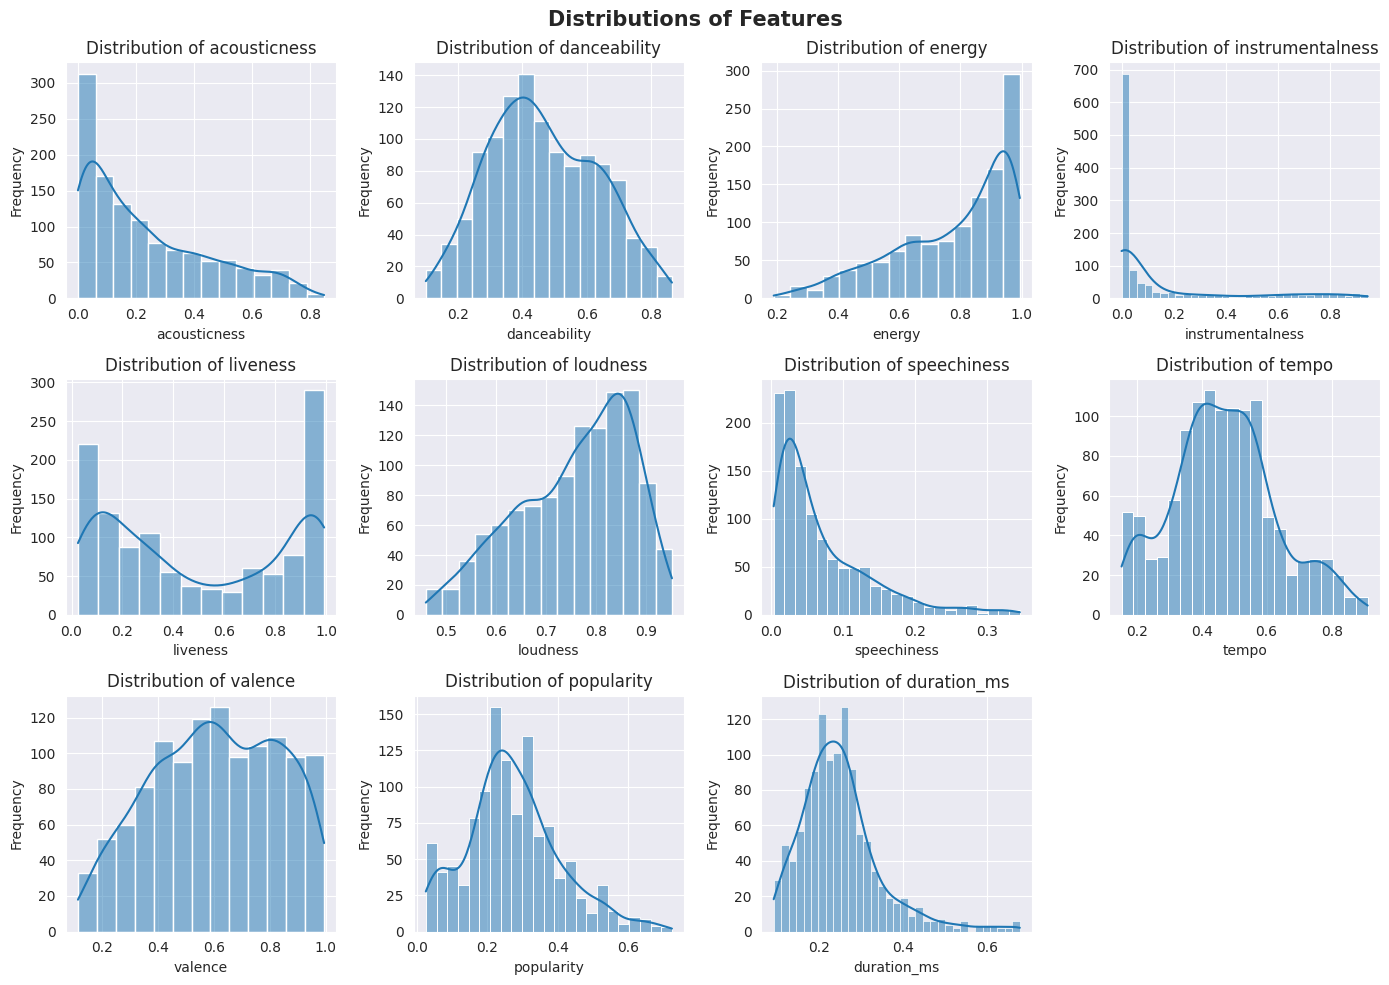

In [21]:
fig = plt.figure(figsize=(14, 10))
for i, feature in enumerate(df_numeric_columns, start=1):
    plt.subplot(3, 4, i) # There are 11 numeric features
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

fig.suptitle("Distributions of Features", fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()

**Observations:**

Distributions of different features are as follows:

| Feature          |      Distribution    |
|------------------|----------------------|
| acousticness     |Positively skewed     |
| danceability     |Non-symmetric bimodel |
| energy           |Negatively skewed     |
| instrumentalness |Positively skewed     |
| liveness         |Non-symmetric bimodel |
| loudness         |Negatively skewed     |
| speechiness      |Positively skewed     |
| tempo            |Non-symmetric Multimodel|
| valence          |Non-symmetric bimodel |
| popularity       |Non-symmetric bimodel |
| duration_ms      |Positively skewed     |


---

- Data Correlation

In [22]:
df[df_numeric_columns].corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
acousticness,1.000000,0.060487,-0.336583,0.011426,-0.083914,-0.173019,-0.112060,-0.115223,-0.100271,0.103920,0.098525
danceability,0.060487,1.000000,-0.314107,0.014774,-0.500768,-0.327580,-0.334496,-0.280463,0.511039,0.155797,-0.236212
energy,-0.336583,-0.314107,1.000000,0.084342,0.497458,0.690509,0.498931,0.195760,0.025768,-0.107743,0.146439
instrumentalness,0.011426,0.014774,0.084342,1.000000,-0.036910,0.016465,-0.036986,0.096007,0.175702,0.006158,-0.112717
liveness,-0.083914,-0.500768,0.497458,-0.036910,1.000000,0.358210,0.416553,0.075929,-0.337548,-0.251422,0.301811
loudness,-0.173019,-0.327580,0.690509,0.016465,0.358210,1.000000,0.305461,0.069930,-0.149908,0.092560,0.182098
speechiness,-0.112060,-0.334496,0.498931,-0.036986,0.416553,0.305461,1.000000,0.236410,-0.395443,-0.175345,0.151924
tempo,-0.115223,-0.280463,0.195760,0.096007,0.075929,0.069930,0.236410,1.000000,0.033368,-0.075020,-0.068857
valence,-0.100271,0.511039,0.025768,0.175702,-0.337548,-0.149908,-0.395443,0.033368,1.000000,0.068862,-0.322272
popularity,0.103920,0.155797,-0.107743,0.006158,-0.251422,0.092560,-0.175345,-0.075020,0.068862,1.000000,0.017893


- Data Correlation Visualization

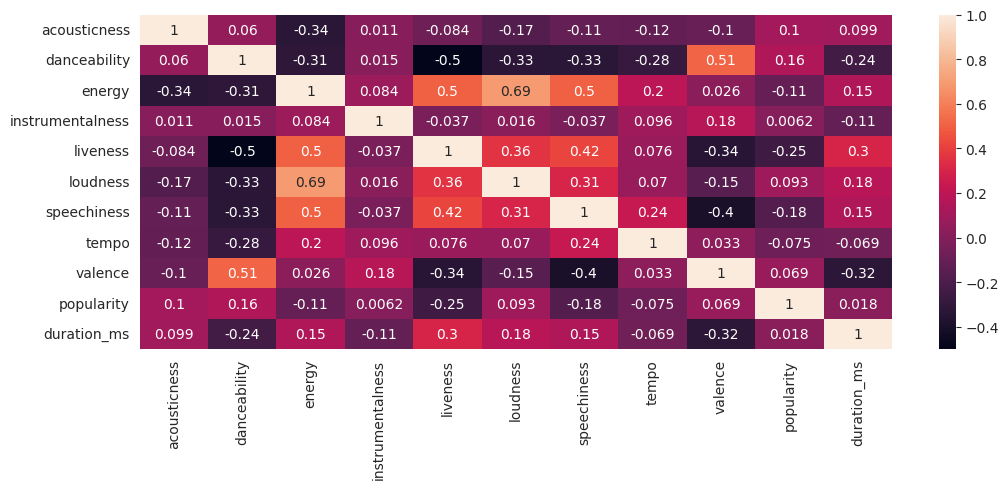

In [23]:
plt.figure(figsize=(11,5))
sns.heatmap(df[df_numeric_columns].corr(), annot=True)
plt.tight_layout()
plt.show()

**Positive Correlation:**

|Feature1     |Feature2 |Correlation |
|-------------|---------|------------|
|loudness     |energy   |0.69        |
|danceability |valence  |0.51        |
|speechiness  |energy   |0.5         |
|liveness     |energy   |0.5         |
|speechiness  |liveness |0.42        |
|liveness     |loudness |0.36        |

**Negative Correlation:**

|Feature1     |Feature2     |Correlation |
|-------------|-------------|------------|
|liveness     |danceability |-0.5        |
|speechiness  |valence      |-0.4        |
|liveness     |valence      |-0.34       |
|energy       |acousticness |-0.34       |
|danceability |loudness     |-0.33       |
|danceability |speechiness  |-0.33       |
|danceability |energy       |-0.31       |

---

- Visualize relations between different features to observe the patterns of above correlation

In [24]:
# Function to plot feature relations
def plot_feature_relations(feature1, feature2, rows, cols, plot_num, fontsize):
  plt.subplot(rows, cols, plot_num)
  sns.scatterplot(x=df[feature1], y=df[feature2], s=5)
  plt.title(f"{feature2} vs {feature1}", fontweight='bold', fontsize=fontsize)
  plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=fontsize)
  plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=fontsize)
  plt.xlabel(feature1, fontsize=fontsize)
  plt.ylabel(feature2, fontsize=fontsize)

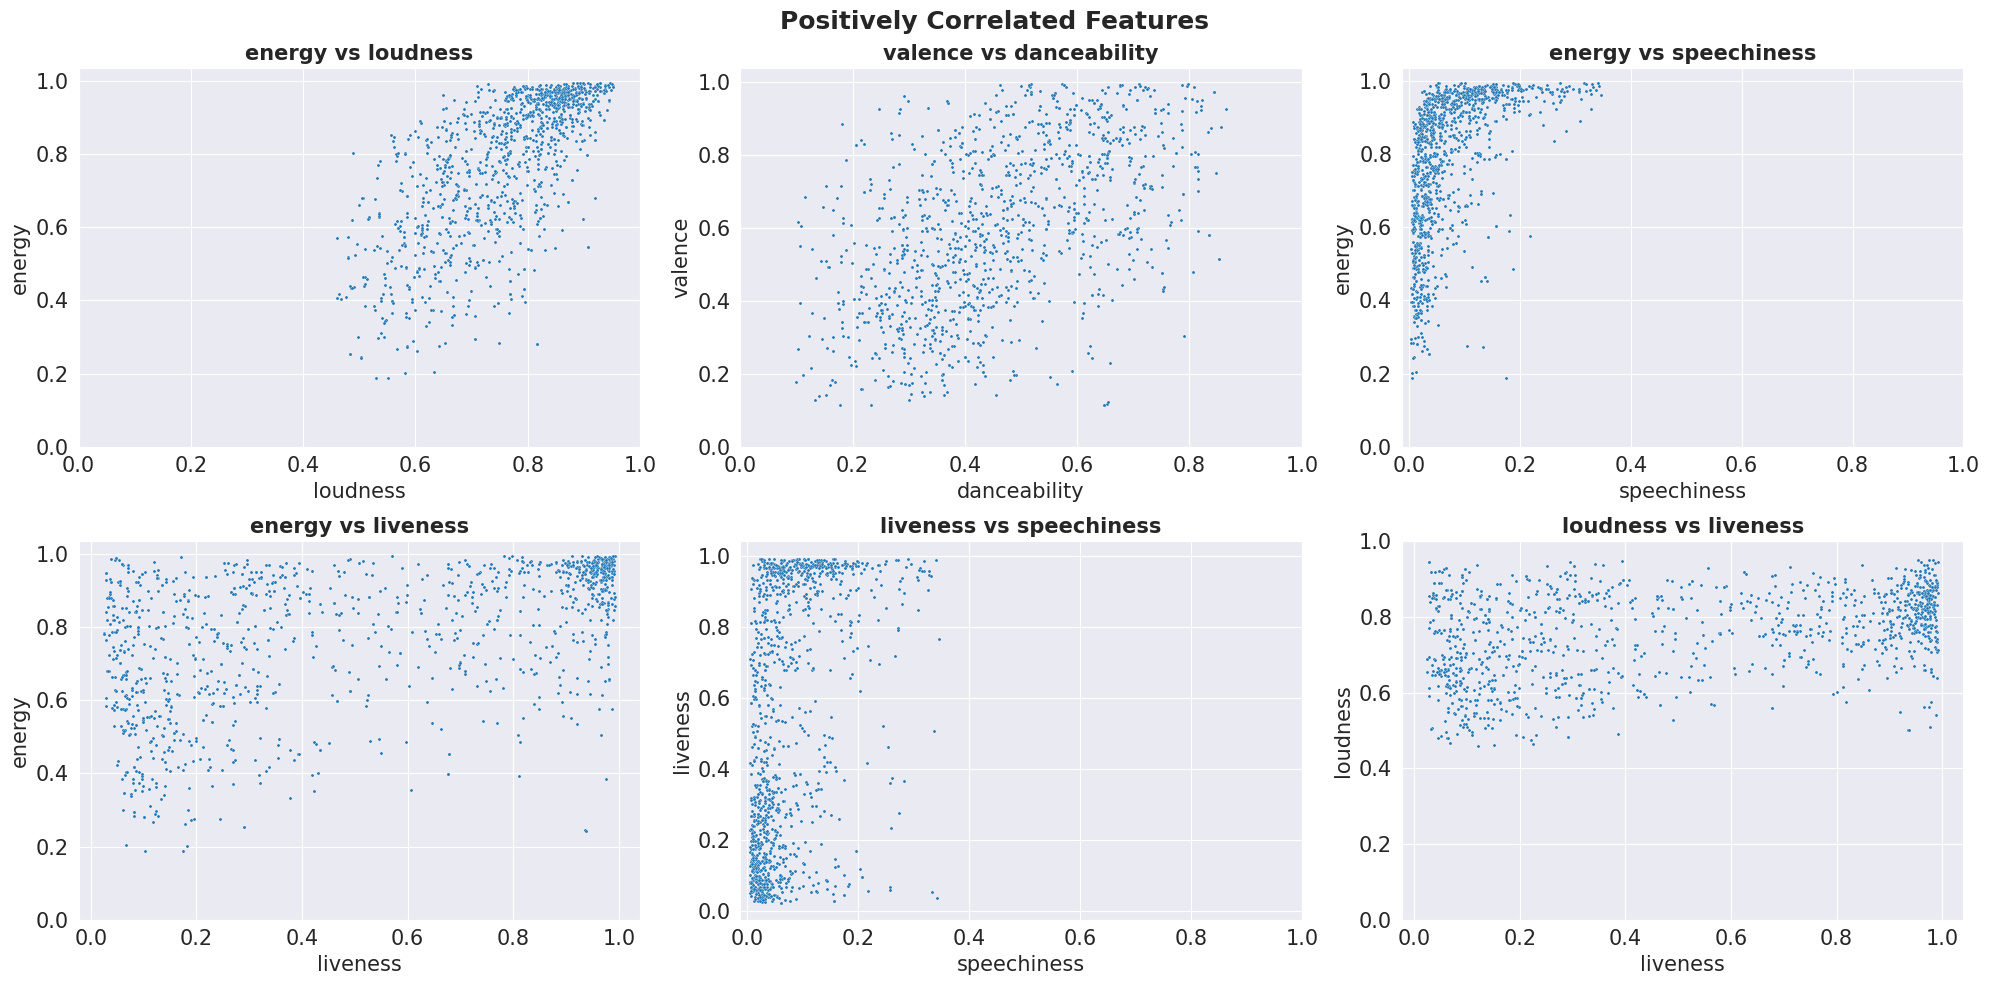

In [25]:
# Visualizations for positively correlated features

fig = plt.figure(figsize=(20, 10))
rows = 2
cols = 3
fontsize = 15

plot_feature_relations('loudness', 'energy', rows, cols, 1, fontsize)
plot_feature_relations('danceability', 'valence', rows, cols, 2, fontsize)
plot_feature_relations('speechiness', 'energy', rows, cols, 3, fontsize)
plot_feature_relations('liveness', 'energy', rows, cols, 4, fontsize)
plot_feature_relations('speechiness', 'liveness', rows, cols, 5, fontsize)
plot_feature_relations('liveness', 'loudness', rows, cols, 6, fontsize)

fig.suptitle("Positively Correlated Features", fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()

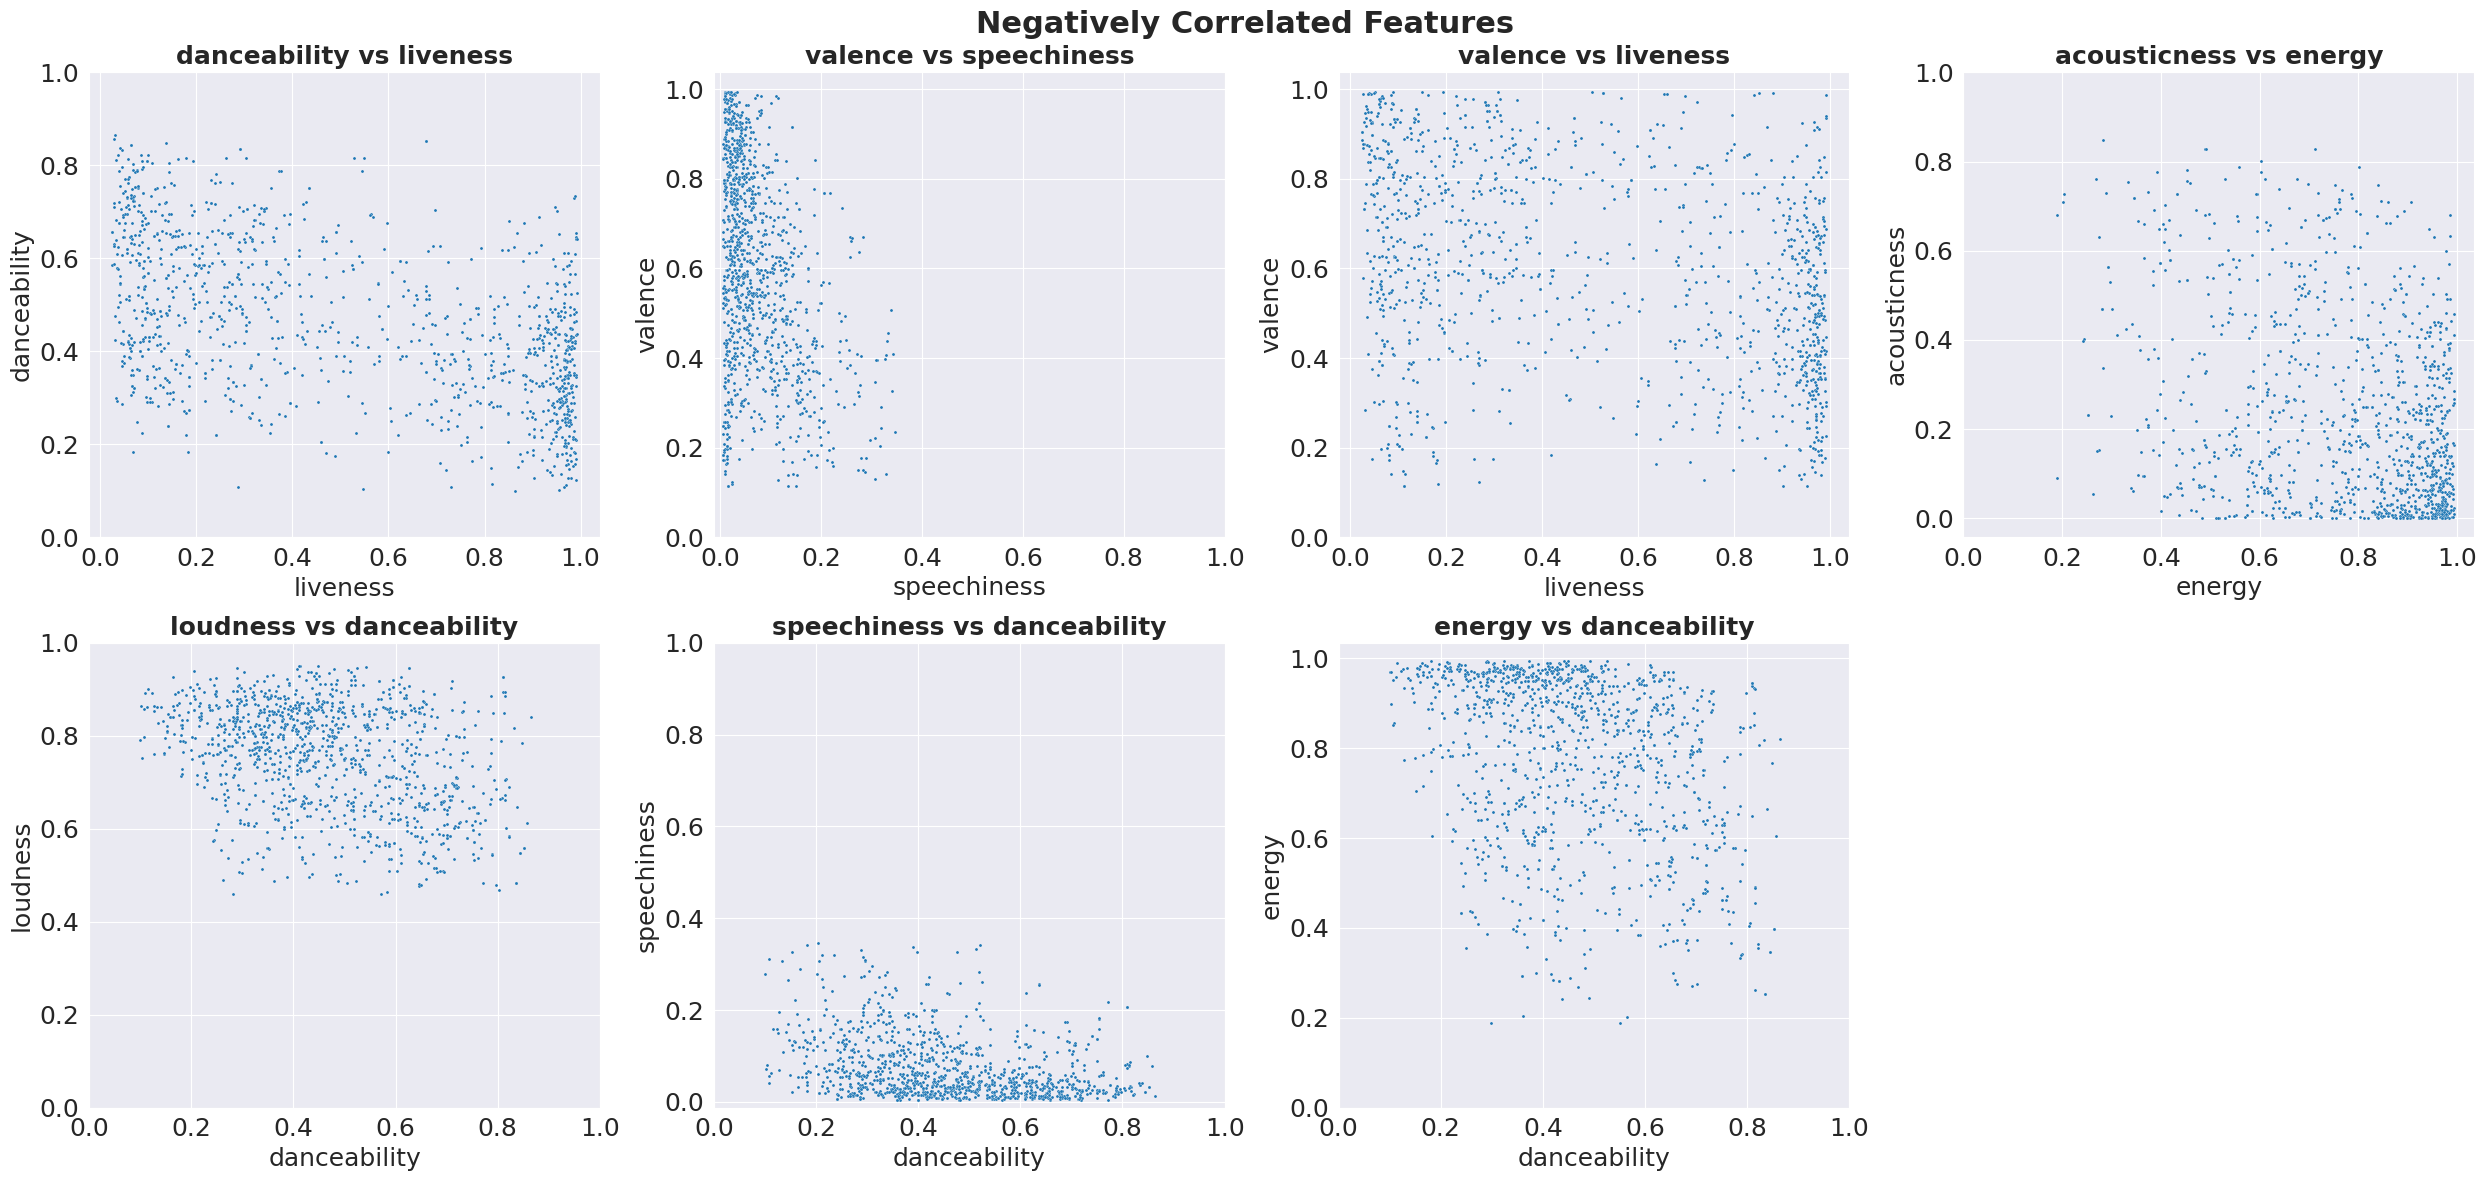

In [26]:
# Visualizations for negatively correlated features

fig = plt.figure(figsize=(25, 12))
rows = 2
cols = 4
fontsize = 18

plot_feature_relations('liveness', 'danceability', rows, cols, 1, fontsize)
plot_feature_relations('speechiness', 'valence', rows, cols, 2, fontsize)
plot_feature_relations('liveness', 'valence', rows, cols, 3, fontsize)
plot_feature_relations('energy', 'acousticness', rows, cols, 4, fontsize)
plot_feature_relations('danceability', 'loudness', rows, cols, 5, fontsize)
plot_feature_relations('danceability', 'speechiness', rows, cols, 6, fontsize)
plot_feature_relations('danceability', 'energy', rows, cols, 7, fontsize)

fig.suptitle("Negatively Correlated Features", fontweight='bold', fontsize=22)
plt.tight_layout()
plt.show()

##Discover how a song's popularity relates to various factors and how this has changed over time.

- Correlation of popularity w.r.t. other features

In [27]:
correlation = df[df_numeric_columns].corr()['popularity'].sort_values(ascending=False)
print("Correlation with Popularity:")
print(correlation)

Correlation with Popularity:
popularity          1.000000
danceability        0.155797
acousticness        0.103920
loudness            0.092560
valence             0.068862
duration_ms         0.017893
instrumentalness    0.006158
tempo              -0.075020
energy             -0.107743
speechiness        -0.175345
liveness           -0.251422
Name: popularity, dtype: float64


- Visualize how popularity changes w.r.t. other features

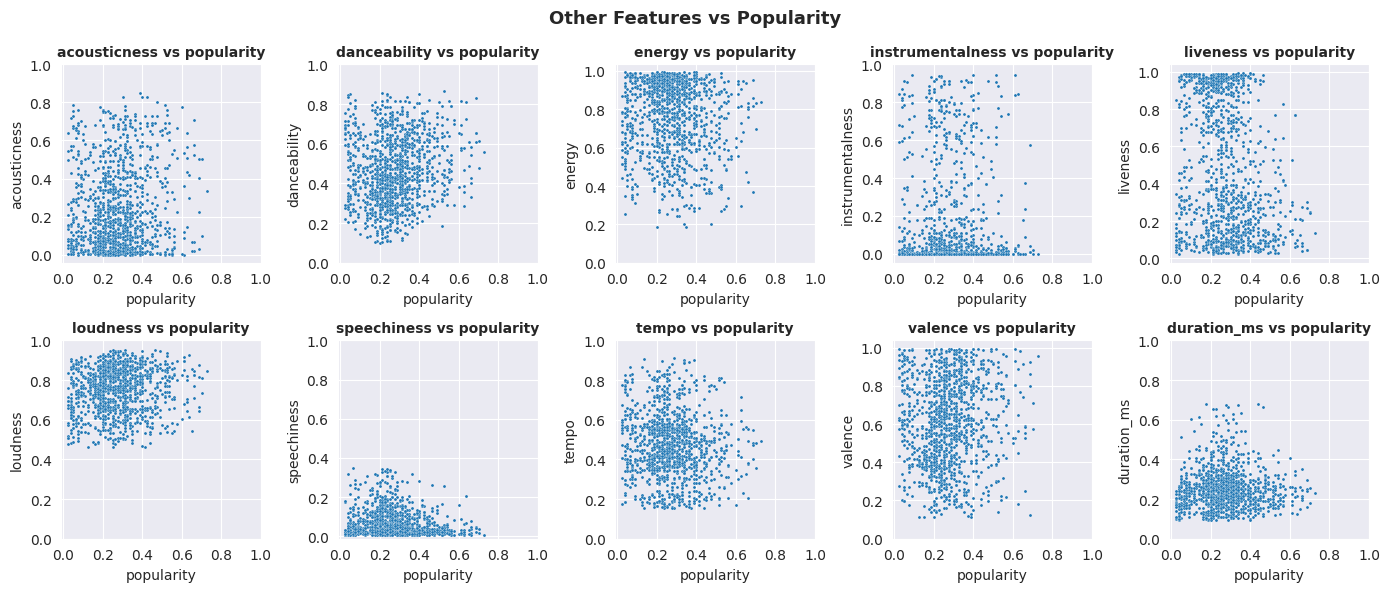

In [28]:
fig = plt.figure(figsize=(14, 6))
j = 1

rows = 2
cols = 5 # There are 10 numeric features other than 'popularity'
fontsize = 10

for feature in df_numeric_columns:
  if feature != 'popularity':
    plot_feature_relations('popularity', feature, rows, cols, j, fontsize)
    j += 1

fig.suptitle("Other Features vs Popularity", fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

- Visualize how popularity changes w.r.t. time

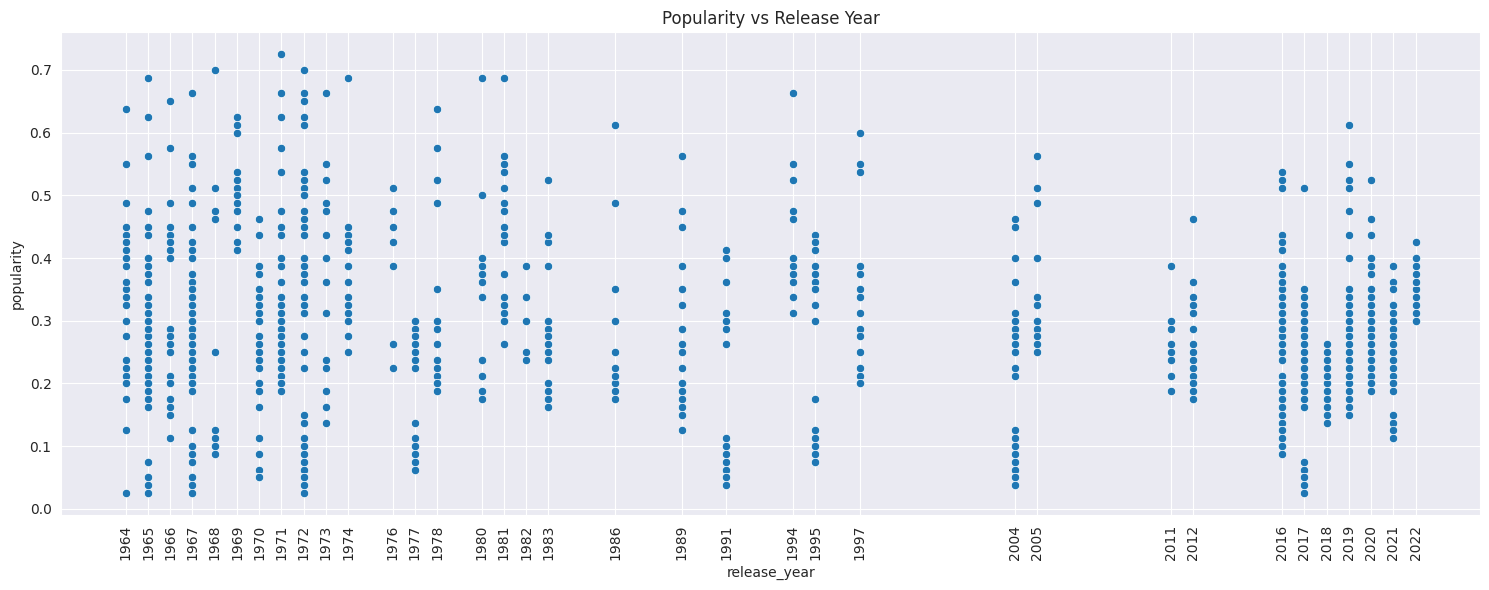

In [29]:
plt.figure(figsize=(15, 6))
sns.scatterplot(y=df['popularity'], x=df['release_year'])
plt.title('Popularity vs Release Year')
plt.xticks((df['release_year'].unique())[::-1], rotation=90)
plt.tight_layout()
plt.show()

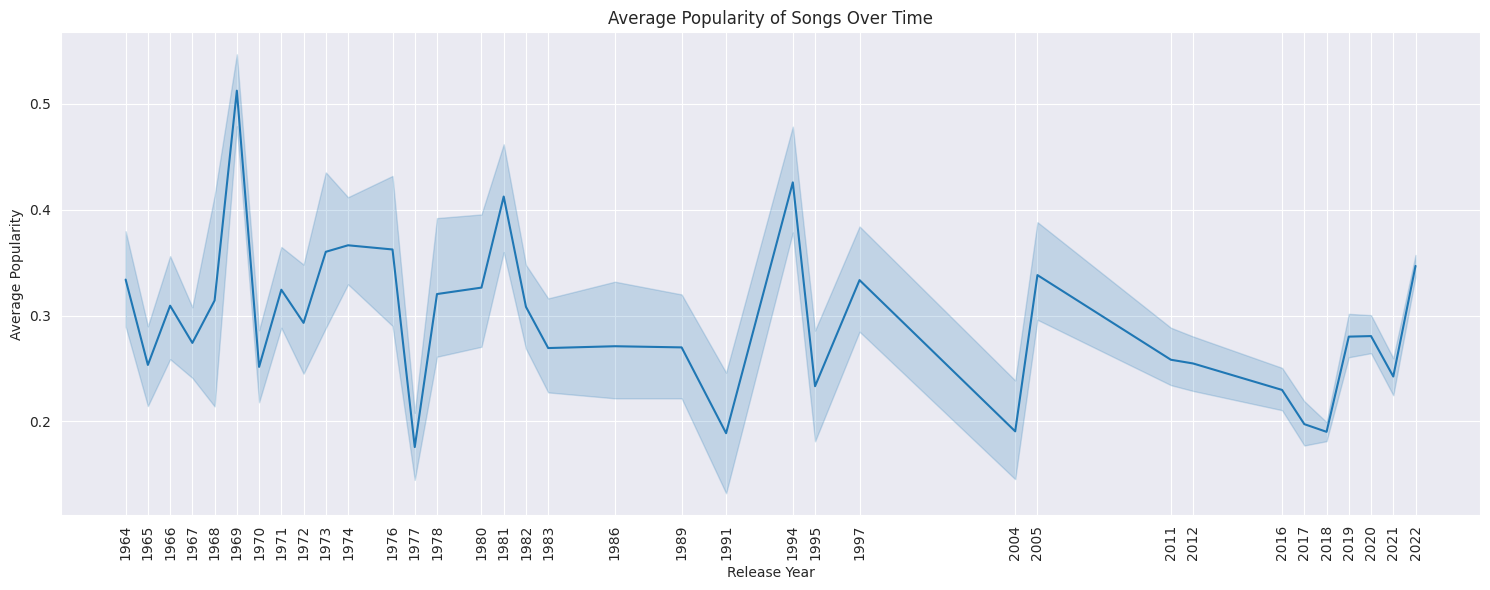

In [30]:
# Visualize Trends Over Time
# Plot how the average popularity of songs has changed over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='release_year', y='popularity', data=df)
plt.title("Average Popularity of Songs Over Time")
plt.xticks((df['release_year'].unique())[::-1], rotation=90)
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.tight_layout()
plt.show()

**Observation:**

From the above 2 graphs, it is evident that
- The **highest** avaerage popluarity was in **1969**
- The **lowest** average popularity was in **1977**.

---

##Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.

Dimensionality reduction techniques are essential in data analysis, especially when dealing with high-dimensional datasets like those commonly encountered in music or other domains. Here are some key points highlighting the importance of dimensionality reduction techniques:

**Curse of Dimensionality:**

As the number of features (dimensions) increases, the volume of the feature space grows exponentially. This phenomenon, known as the curse of dimensionality, can lead to sparsity of data, increased computational complexity, and degraded performance of machine learning algorithms. Dimensionality reduction techniques help mitigate these issues by reducing the number of features while preserving as much useful information as possible.

**Visualization:**

Dimensionality reduction technique such as Principal Component Analysis (PCA) enables visualization of high-dimensional data in lower-dimensional space. By projecting the data onto a lower-dimensional subspace, these techniques allow us to visualize clusters, patterns, and relationships that may not be apparent in the original high-dimensional space. This aids in exploratory data analysis, interpretation, and communication of insights.

**Feature Selection and Engineering:**

Dimensionality reduction techniques can assist in feature selection and engineering by identifying the most informative features or generating new features that capture important patterns in the data. By focusing on a subset of relevant features, we can improve model interpretability, reduce overfitting, and enhance predictive performance.

**Computational Efficiency:**

High-dimensional datasets often pose challenges in terms of computational resources and algorithm scalability. Dimensionality reduction techniques help alleviate these issues by reducing the computational burden associated with processing and analyzing high-dimensional data. This leads to faster model training, inference, and overall computational efficiency.

**Noise Reduction and Generalization:**

By capturing the most salient features and discarding irrelevant or noisy dimensions, dimensionality reduction techniques can improve the generalization ability of machine learning models. Removing redundant or irrelevant features reduces the risk of overfitting and improves the model's ability to generalize to unseen data.

**Enhanced Interpretability:**

Reduced-dimensional representations obtained through dimensionality reduction techniques are often more interpretable than their high-dimensional counterparts. By summarizing the data in a lower-dimensional space, these techniques facilitate easier interpretation of patterns, relationships, and anomalies, leading to actionable insights and informed decision-making.


In summary, dimensionality reduction techniques play a crucial role in simplifying and extracting meaningful information from high-dimensional datasets. They enable efficient data exploration, visualization, feature selection, and model building, ultimately leading to improved performance, interpretability, and scalability of machine learning systems.

#Perform Cluster Analysis

Cluster analysis can be performed after using PCA on the features as below.
- **Dimensionality Reduction:** Use PCA is used to reduce the dimensionality of the dataset.
- **Identify the right number of clusters:** Elbow method, silhouette analysis, or dendrogram can be used to determine the optimal number of clusters.
- **Use appropriate clustering algorithm:** Depending on the dataset and problem, a suitable clustering algorithm such as K-means, hierarchical clustering, or DBSCAN can be selected.
- **Define each cluster based on the features:** Once the clusters are determined, the characteristics of each cluster can be analyzed based on the features.

## Dimensionality reduction using PCA

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Dimensionality Reduction with PCA
# Selecting features for clustering
# features = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'] # These are not providing proper silhouette score
features = ['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'] # Removing 'liveness' gives the proper silhouette score

# Applying PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_features = pca.fit_transform(df[features])

print(f"Number of features before PCA is {df.shape[1]}")
print(f"Number of features after PCA is {pca_features.shape[1]}")

Number of features before PCA is 15
Number of features after PCA is 2


15 features are reduced to 2 using PCA.

---

## Identify the right number of clusters

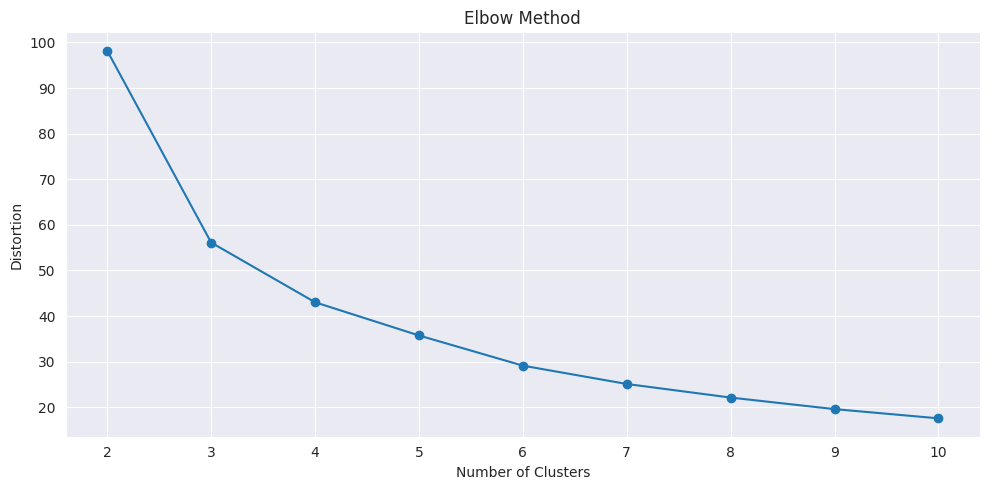

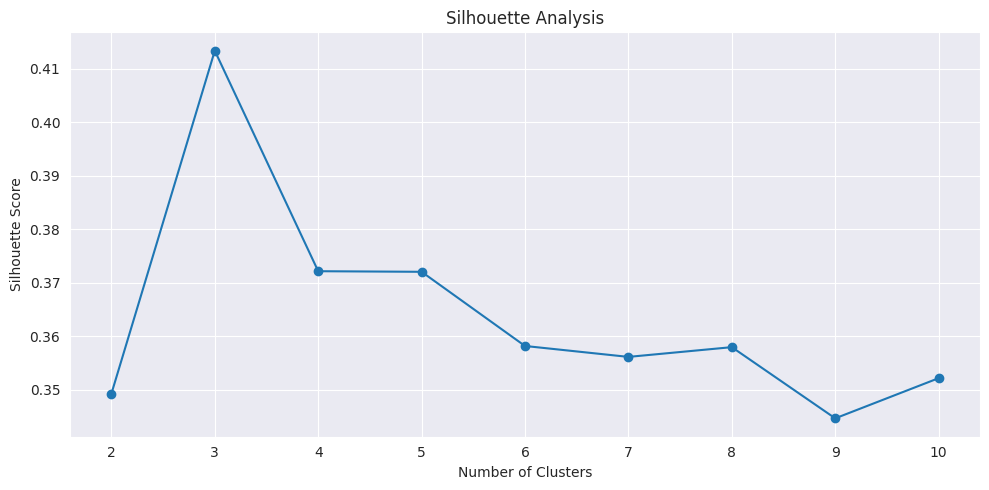

In [32]:
# Step 2: Identify the right number of clusters
# Use the elbow method or silhouette analysis to determine the optimal number of clusters
def find_optimal_clusters(data, max_clusters):
    distortions = []
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_init=10, n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plotting elbow method
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    plt.show()

    # Plotting silhouette scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Analysis')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.show()

# Call the function to find the optimal number of clusters
find_optimal_clusters(pca_features, max_clusters=10)

**Observations:**

- Adding `liveness` to the features in PCA does not produce the proper silhoutte score. So, it is not useful for cluster analysis. Therefore, it is removed from the features to apply PCA.

- From elbow method and silhoutte score, it is evident that right number of clusters for cluster analysis is **3**.

---

##Use appropriate clustering algorithm

In [33]:
# Step 3: Clustering Algorithm
# Based on the elbow method and silhouette analysis, the right number of clusters is 3
n_clusters = 3

# Initialize and fit KMeans clustering algorithm
kmeans = KMeans(n_init=10, n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_features)

KMeans(n_clusters=3, n_init=10, random_state=42)

##Define each cluster based on the features

Cluster Centers:
    acousticness   danceability         energy       loudness    speechiness  \
0  496228.777732  487154.976170  567244.654667  677459.139386   68271.674618   
1  188709.842291  571927.464588  764424.335823  729214.663025   64539.713218   
2  161897.795190  337149.534453  888078.725963  814377.339388  130039.337246   

           tempo        valence     popularity  
0  402381.119054  475390.423988  307709.906518  
1  465921.818610  800651.793648  295883.613521  
2  522061.470440  459383.970421  256571.410343  

Cluster Analysis:
               acousticness  danceability    energy  loudness  speechiness  \
cluster_label                                                                
0                  0.500719      0.472174  0.566345  0.691258     0.042331   
1                  0.172303      0.576429  0.775577  0.736378     0.043297   
2                  0.145275      0.332381  0.902182  0.821916     0.120316   

                  tempo   valence  popularity  
cluster_

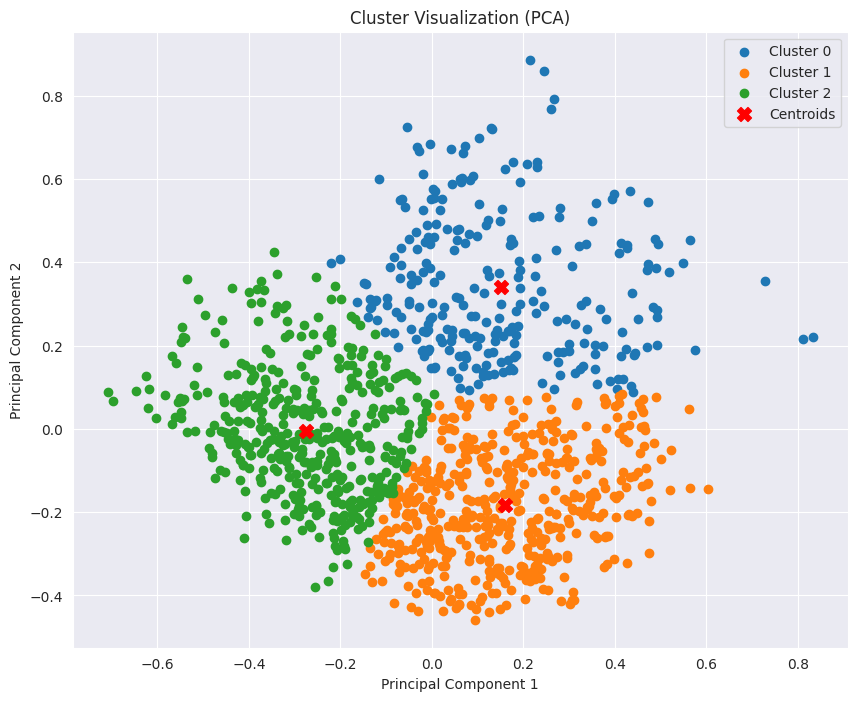

In [34]:
# Step 4: Define each cluster based on the features
# Analyzing cluster centers
cluster_centers = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print("===============")
print(cluster_centers_df)

# Assigning cluster labels to the original dataset
df['cluster_label'] = kmeans.labels_

# Analyzing each cluster based on features
cluster_analysis = df.groupby('cluster_label')[features].mean()
print("\nCluster Analysis:")
print("==================")
print(cluster_analysis)
print("\n\n")

# Visualize clusters
#====================
plt.figure(figsize=(10, 8))

# Plot data points for each cluster
for cluster_label in range(n_clusters):
    plt.scatter(pca_features[df['cluster_label'] == cluster_label][:, 0],
                pca_features[df['cluster_label'] == cluster_label][:, 1],
                label=f'Cluster {cluster_label}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='red', marker='X', label='Centroids')

plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()